In [1]:
import nltk
import pandas as pd
import os,math,glob,re,copy

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,RegexpTokenizer,TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

import re as regex
import numpy as np
import scipy
from sklearn.externals import joblib
import contractions
from operator import itemgetter
from itertools import chain

from sklearn.manifold import TSNE
from pandas import DataFrame
import seaborn as sn
import matplotlib.pyplot as mt

In [2]:
# from my previous assignment
def contract(text):
    return contractions.fix(text)

def regTokenize(text):
#     tok=RegexpTokenizer('[A-Za-z0-9]*[.]?\w+')
    tok=RegexpTokenizer('[A-Za-z0-9]?\w+')
    return tok.tokenize(text) 

def lowercase(text):
    return text.lower()

def lemma(words):
    for i in range(0,len(words)):
        words[i]=WordNetLemmatizer().lemmatize(words[i])
    return words

def stemming(words):
    porter_stemmer=PorterStemmer()
    for i in range(0,len(words)):
        words[i]=porter_stemmer.stem(words[i])
    return words

def tweet(words):
    tok=TweetTokenizer()
    return tok.tokenize(words)

def comma(text):
    text = "".join(c for c in text if c not in ('!','.',':',',','"','?','(',')'))
    return text

In [3]:
#some functions are from 2nd Assignment
def getDocLength(docId):#getting len(document)=number of words in that document from metadata
    return metadata.get(docId)

def getWordFreqInBodyDoc(docId,word):#getting word frequency in doc in document
    f=open(docId,'r+',errors='ignore')
    data=f.read()
    data=lowercase(data)
    data=contract(data)
    data=comma(data)
    data=regTokenize(data)
    data=lemma(data)
#     data=stemming(data)
    freq=data.count(word)
    return freq

def getQTermPosts(term):#getting postings of term from dictionary
    return terms_dictionary_load.get(term)[1]

def getTermDocFreq(t):
    return terms_dictionary_load.get(t)[0]

def getDocWords(docId):
    f=open(docId,'r+',errors='ignore')
    data=f.read()
    data=lowercase(data)
    data=contract(data)
    data=comma(data)
    data=regTokenize(data)
    data=lemma(data)
#     data=stemming(data)
    return data

In [4]:
document_ids=[]
# metadata=[]
metadata={}
terms=[]
terms_dictionary={}

path = '20_newsgroups'
print(path)
for dire in glob.glob(os.path.join(path, '*')):
    print(dire)
    for filename in glob.glob(os.path.join(dire, '*')):
        st=filename.split('\\')
        s=path+'/'+st[1]+'/'+st[2]
#         print(s)
        docId=s
        document_ids.append(docId)

        f=open(filename,'r+')
        data=f.read()

        data=lowercase(data)
        data=contract(data)
        data=regTokenize(data)
        data=lemma(data)
#         data=stemming(data)

        data=list(set(data))
        
        temp=[]
        temp.append(s)
        temp.append(len(data))
#         metadata.append(temp)
        metadata[s]=len(data)
        
        for t in data:
            terms.append(t)
            if(t not in terms_dictionary.keys()):
                terms_dictionary[t]=[]
                docfreq=1
                terms_dictionary[t].append(docfreq)
                docs=[docId]
                terms_dictionary[t].append(docs)
            else:
                terms_dictionary.get(t)[1].append(docId)
                terms_dictionary.get(t)[0]=len(terms_dictionary.get(t)[1])
    print('============================================================')

20_newsgroups
20_newsgroups\comp.graphics
20_newsgroups\rec.motorcycles


In [5]:
terms=list(set(terms))

In [6]:
for i in metadata:
    print(i,' ',metadata.get(i))
    break
for i in terms:
    print(i)
    break
print(len(terms))

# print(terms_dictionary.get('bike'))

20_newsgroups/comp.graphics/37261   226
cae
30172


In [7]:
vsm=[]

n=len(document_ids)
count=0
for i in document_ids:
#     print(i)
    d_tf_idf=[]

    doc_words=getDocWords(i)
    doc_length=getDocLength(i)
    for w in terms:
#         print(w)
        freq=doc_words.count(w)
        tf=freq/doc_length

        inner=n/terms_dictionary.get(w)[0]
        idf=math.log(inner)
        tf_idf=tf*idf
        
        d_tf_idf.append(tf_idf)
    vsm.append(d_tf_idf)
    
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


In [8]:
documentIds_fname='sav/1/document_ids.sav'
joblib.dump(document_ids,documentIds_fname)

metadata_fname='sav/1/metadata.sav'
joblib.dump(metadata,metadata_fname)

terms_fname='sav/1/terms.sav'
joblib.dump(terms,terms_fname)

terms_dictionary_fname='sav/1/terms_dictionary.sav'
joblib.dump(terms_dictionary,terms_dictionary_fname)

vsm_fname='sav/1/vsm.sav'
joblib.dump(vsm,vsm_fname)

['sav/1/vsm.sav']

### Input

In [9]:
document_ids_load=joblib.load('sav/1/document_ids.sav')
metadata=joblib.load('sav/1/metadata.sav')
terms_load=joblib.load('sav/1/terms.sav')
terms_dictionary_load=joblib.load('sav/1/terms_dictionary.sav')
vsm_load=joblib.load('sav/1/vsm.sav')

In [10]:
def pre_processing_test(term):
    term=lowercase(term)
    term=contract(term)
    term=comma(term)
    term=regTokenize(term)
    term=lemma(term)
#     term=stemming(term)
    return term

def getQPosts(qterms):
    qp=[]
    for i in qterms:
        if(i in terms_dictionary_load.keys()):
            posts=getQTermPosts(i)
        else:
            print(i,' not in dictionary.')
            posts=[]
        qp.append(posts)
    return qp

def getQVector(q_terms):
    q_vsm=[0 for i in range(len(terms_load))]
    for w in range(len(terms_load)):
        word=terms_load[w]
        if(word in q_terms):
            tf=q_terms.count(word)
        else:
            tf=0
        q_vsm[w]=tf
    return q_vsm

def getTOPK(qTerms,q_vector):
    q_posts=getQPosts(qTerms) #getting all query terms postings

    ### query vector
    if(len(q_vector)==0):
        q_vector=getQVector(qTerms)
    
    ### getting postings
    total_postings=set.union(*map(set,q_posts))
    total_postings=list(total_postings)
    print('total_postings:',len(total_postings))

    ### cosine similarity with documents and storing
    cosine_values=[]
    result=[]

    for i in range(len(document_ids_load)):
        cosine_values.append([document_ids_load[i],0])

    for i in total_postings:
        index=document_ids_load.index(i)

        dot_prod=np.dot(vsm_load[index],q_vector)
        a=np.linalg.norm(vsm_load[index],ord=2)
        b=np.linalg.norm(q_vector,ord=2)
        numerator=dot_prod
        denominator=a*b
        sim=numerator/denominator
        cosine_values[index]=[document_ids_load[index],sim]
        result.append([document_ids_load[index],sim])

    ### sorting
    sorted_cosines = sorted(cosine_values, key=itemgetter(1),reverse=True)
    retrieved_sorted=sorted(result,key=itemgetter(1),reverse=True)
    
    return sorted_cosines,retrieved_sorted,q_vector
    

### Input

In [27]:
query=input('enter query:')
k=int(input('enter k:'))
print(query,' ', k)

enter query:motor cycle
enter k:10
motor cycle   10


total_postings: 66
0 --> ['20_newsgroups/rec.motorcycles/104674', 0.15502359515452596]
1 --> ['20_newsgroups/rec.motorcycles/104754', 0.1347805735413942]
2 --> ['20_newsgroups/rec.motorcycles/105236', 0.12071042956736978]
3 --> ['20_newsgroups/rec.motorcycles/104502', 0.10912162114759702]
4 --> ['20_newsgroups/rec.motorcycles/104966', 0.10396224326967393]
5 --> ['20_newsgroups/rec.motorcycles/103226', 0.090658499829332]
6 --> ['20_newsgroups/rec.motorcycles/103184', 0.08463324655142221]
7 --> ['20_newsgroups/comp.graphics/39005', 0.07724735793560815]
8 --> ['20_newsgroups/rec.motorcycles/104630', 0.07666162730318983]
9 --> ['20_newsgroups/rec.motorcycles/105251', 0.07546043666008086]

---------------------
choice:
1.Give feedback
2.exit
enter choice:1
enter index(comma seperated) of relevant doc:1,2,5,6,7
['1', '2', '5', '6', '7']
[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2]


c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


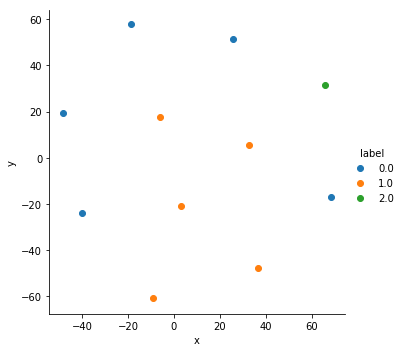

total_postings: 66
0 --> ['20_newsgroups/rec.motorcycles/104754', 0.1635686974295711]
1 --> ['20_newsgroups/rec.motorcycles/104674', 0.1567563431798681]
2 --> ['20_newsgroups/rec.motorcycles/105236', 0.14505081345205403]
3 --> ['20_newsgroups/rec.motorcycles/104502', 0.12687211645763852]
4 --> ['20_newsgroups/rec.motorcycles/103184', 0.11640850550982908]
5 --> ['20_newsgroups/rec.motorcycles/103226', 0.11544680609457932]
6 --> ['20_newsgroups/comp.graphics/39005', 0.11336374488286062]
7 --> ['20_newsgroups/rec.motorcycles/104966', 0.10466506103388978]
8 --> ['20_newsgroups/rec.motorcycles/104630', 0.0840598046844764]
9 --> ['20_newsgroups/rec.motorcycles/105251', 0.07825682865288765]

---------------------
choice:
1.Give feedback
2.exit
enter choice:1
enter index(comma seperated) of relevant doc:3,4,6,7,8
['3', '4', '6', '7', '8']
[0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2]


c:\users\subhani\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


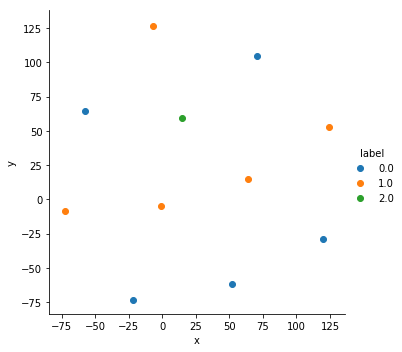

total_postings: 66
0 --> ['20_newsgroups/rec.motorcycles/105236', 0.16335977114057146]
1 --> ['20_newsgroups/rec.motorcycles/104754', 0.1630637189780261]
2 --> ['20_newsgroups/rec.motorcycles/104674', 0.15780968129267198]
3 --> ['20_newsgroups/rec.motorcycles/104502', 0.15421688559584235]
4 --> ['20_newsgroups/comp.graphics/39005', 0.14961977179405356]
5 --> ['20_newsgroups/rec.motorcycles/103184', 0.14884985256439945]
6 --> ['20_newsgroups/rec.motorcycles/104966', 0.14506713696215975]
7 --> ['20_newsgroups/rec.motorcycles/104630', 0.11963230575616111]
8 --> ['20_newsgroups/rec.motorcycles/103226', 0.11217948403995907]
9 --> ['20_newsgroups/comp.graphics/39034', 0.09277472528286422]

---------------------
choice:
1.Give feedback
2.exit
enter choice:2
exit...


In [28]:
q_vector=[]
while(True):
    # print(set(q_vector))
    #     --------------------------------------------------------------------------------------------------------------
    q_terms=pre_processing_test(query)
#     print(q_terms)
    sorted_scores,result_sorted,q_vector=getTOPK(q_terms,q_vector)

    ### printing the top k
    flag=False
    feedback=[]
    feedback_vectors=[]
    if(k<len(result_sorted)):
        for i in range(0,k):
            temp=[]
            temp.append(result_sorted[i])
            temp.append(0)
            feedback.append(temp)


            temp_1=[]
            index=document_ids_load.index(result_sorted[i][0])
            temp_1.append(vsm_load[index])
            temp_1.append(0)
            feedback_vectors.append(temp_1)

            print(i,'-->',result_sorted[i])
            flag=True
    else:
        for i in range(0,len(result_sorted)):
            print(i,'-->',result_sorted[i])
            flag=True

    if(not flag):
        print('No Documents are matched.')

    #     --------------------------------------------------------------------------------------------------------------

    print('\n---------------------\nchoice:\n1.Give feedback\n2.exit')
    choice=int(input('enter choice:'))
    if(choice==1):
        feedback_index=[]
        inp=input('enter index(comma seperated) of relevant doc:')
        f=inp.split(',')
        print(f)
        for i in f:
            feedback_index.append(int(i))
        feedback_index=list(set(feedback_index)) # convert to set and then to list

        for i in feedback_index:
            feedback[i][1]=1
            feedback_vectors[i][1]=1

        feed_rel=[]
        feed_nonrel=[]
        for i in feedback:
            if(i[1]==1):
                feed_rel.append(i)
            else:
                feed_nonrel.append(i)

        feed_rel_vec=[]
        feed_nonrel_vec=[]
        for i in feed_rel:
            index=document_ids_load.index(i[0][0])
            feed_rel_vec.append(vsm_load[index])
        for i in feed_nonrel:
            index=document_ids_load.index(i[0][0])
            feed_nonrel_vec.append(vsm_load[index])
    #     --------------------------------------------------------------------------------------------------------------            

        feed_rel_vec_=np.asarray(feed_rel_vec)
        feed_nonrel_vec_=np.asarray(feed_nonrel_vec)

        feed_rel_vec_mean=np.mean(feed_rel_vec_,axis=0)
        feed_nonrel_vec_mean=np.mean(feed_nonrel_vec_,axis=0)

        alpha,beta,gamma=1,0.75,0.15
        updated=alpha*np.asarray(q_vector) + beta*feed_rel_vec_mean - gamma* feed_nonrel_vec_mean
        
        q_vector_prev=copy.deepcopy(q_vector)
        
        q_vector=updated
        
        for i in range(0,len(q_vector)):
            if(q_vector[i]<0):
                q_vector[i]=0
                
        x=np.asarray(feedback_vectors)[:,0]
        x=x.tolist()
        x.append(q_vector_prev)
#         x.append(q_vector)
        y=np.asarray(feedback_vectors)[:,1]
        y=y.tolist()
        y.append(2)
#         y.append(3)
        print(y)

        
        tsne = TSNE(n_components=2, random_state=0)
        tsne_data = tsne.fit_transform(x)
        tsne_data = np.vstack((tsne_data.T, y)).T
        tsne_df = DataFrame(data=tsne_data, columns=("x", "y", "label"))
        sn.FacetGrid(tsne_df, hue="label", size=5).map(mt.scatter, 'x', 'y').add_legend()
        mt.show()
    else:
        print('exit...')
        break
